In [21]:
import re
import string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import LinearSVC
from ipynb.fs.full.preprocessing import preprocess
from ipynb.fs.full.parser import extract_info
from ipynb.fs.full.help_functions import number_stances, group_labels, join_titles, train_test_split_func, plot_confusion_matrix

In [22]:
#max size = 387692
l_conclusions, l_premises, l_stances = extract_info("args-me.json", sample_size = 2)

#Agrupa a informação extraída

data = [l_conclusions, l_premises, l_stances]

#Verifica as dimensões - Confirmar se o pandas não faz isso automaticamente

if(len(l_conclusions) == len(l_premises) and len(l_premises) == len(l_stances)):
    print("Sample size is : {}".format(len(l_conclusions)))
    print("Done!")
    
else:
    print("Dimensions don't match.")

Sample size is : 2
Done!


In [23]:
#Preprocessing

#premises_prep = []
#i=0

#for premise in l_premises:
    #premise_prep = preprocess(premise)
    #premises_prep.append(premise_prep)
    #print(i)
    #i += 1

In [24]:
stances_numbered = number_stances(l_stances)
text_df = join_titles(l_conclusions, l_premises)
labels = group_labels(stances_numbered)

In [25]:
X_train, X_test, y_train , y_test = train_test_split_func(text_df, labels, test_size = 1)

X_train's size is : (1,)
X_test's size is : (1,)
y_train's size is : (1,)
y_test's size is : (1,)


In [26]:
#Pipeline
#tfidf vectorizer

stance_clf = Pipeline([
    ('vect', HashingVectorizer(ngram_range = (1, 2))),
    ('clf', XGBClassifier(random_state = 1)),
    ])

In [27]:
#Treina o classificador

stance_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 HashingVectorizer(alternate_sign=True, analyzer='word',
                                   binary=False, decode_error='strict',
                                   dtype=<class 'numpy.float64'>,
                                   encoding='utf-8', input='content',
                                   lowercase=True, n_features=1048576,
                                   ngram_range=(1, 2), norm='l2',
                                   preprocessor=None, stop_words=None,
                                   strip_accents=None,
                                   token_pattern='(?u)\\b\\w\\w+\\b',
                                   tokenizer=None...
                               interaction_constraints=None,
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints=None, n_estimators=1

In [28]:
#Calcula a accuracy - (base prediction = 50%)

predicted_test = stance_clf.predict(X_test)

accuracy_test = np.mean(predicted_test == y_test) * 100
print("Test Set Accuracy : {}%.".format(accuracy_test))

#ngram (1, 2), XGB , t_size = 0.2 / 10k -> 65.33 %

Test Set Accuracy : 100.0%.


In [29]:
y_test_names = ["CON", "PRO"]
print(classification_report(y_test, predicted_test, target_names=y_test_names ))

ValueError: Number of classes, 1, does not match size of target_names, 2. Try specifying the labels parameter

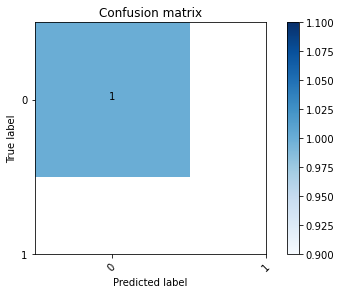

In [30]:
cm = confusion_matrix(predicted_test, y_test)

    
fig, ax = plt.subplots()
plot_confusion_matrix(cm, y_test_names)

plt.show()